# gantt charts

This section describes various options available for gantt charts in **fivecentplots**

See the full API https://endangeredoxen.github.io/fivecentplots/0.6.0/api/gantt.html#gantt

## Setup

Import packages:

In [4]:
%load_ext autoreload
%autoreload 2
import fivecentplots as fcp
import pandas as pd
from pathlib import Path
import datetime

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Read some made-up Gantt chart data for the recording schedule of one of the greatest albums of one of the greatest bands:

In [275]:
df = pd.read_csv(Path(fcp.__file__).parent / 'test_data/fake_data_gantt.csv')
df.head()

,Task,Assigned,Start,Stop,Category
0,Record drums,Taylor,2010-09-01,2010-09-05,Recording
1,Record bass,Nate,2010-09-04,2010-09-06,Recording
2,Record rhythm guitar,Pat,2010-09-06,2010-09-08,Recording
3,Record rhythm guitar,Dave,2010-09-06,2010-09-08,Recording
4,Record lead guitar,Chris,2010-09-07,2010-09-09,Recording


Optionally set the design theme (skipping here and using default):

In [276]:
#fcp.set_theme('gray')
#fcp.set_theme('white')

## Basic chart

We create a basic Gantt chart showing tasks across a time axis specified by start and stop column containing `Datetime` values:

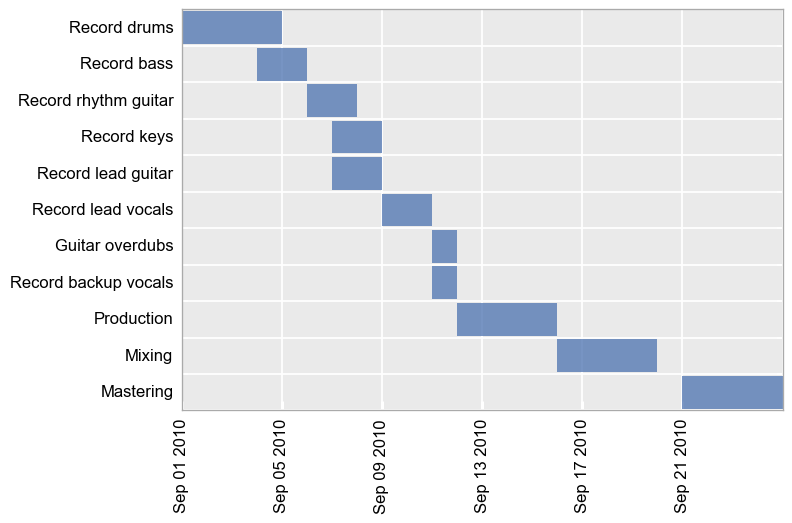

In [277]:
fcp.gantt(df, x=['Start', 'Stop'], y='Task', ax_size=[600, 400])

As with other plots, tick label fonts, sizes, and rotations can all be controlled using the correct ``kwarg``.  See <a href="ticks.html">Grids and ticks</a> for more details.

## Grouping

Like all other plots in <b>fivecentplots</b>, Gantt charts can grouped in various ways to provide further insight into the data set.  This includes: 

* `legend`
* `row`
* `col`
* `wrap`

keyword options.  A couple of examples are shown below.

### Legends

Legends can be used to further distinguish various tasks by assignee or other factors.  If the same task has multiple assignees, they will be split into two different bars in the chart.

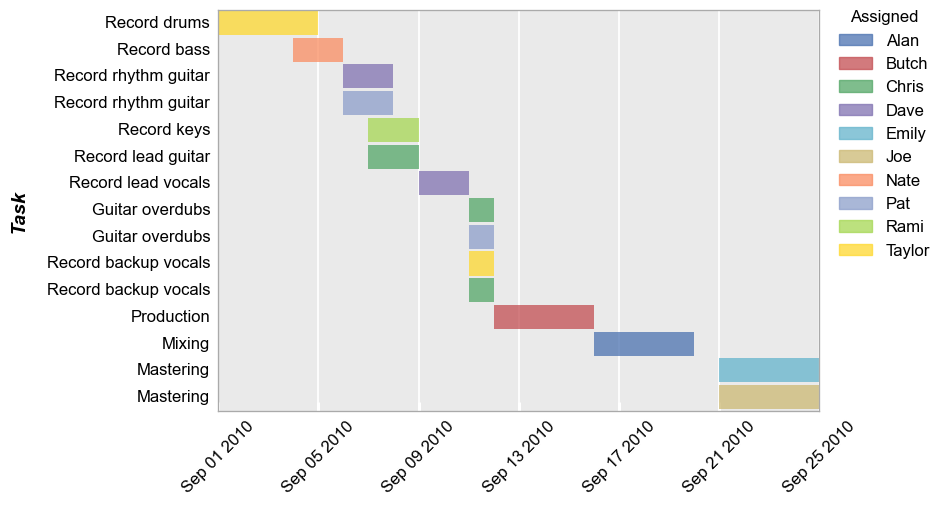

In [5]:
fcp.gantt(df, x=['Start', 'Stop'], y='Task', legend='Assigned', ax_size=[600, 400], gantt_tick_labels_x_rotation=45)

When using a legend, we can also sort the y-axis values based on the order in the legend using keyword `order_by_legend=True`:

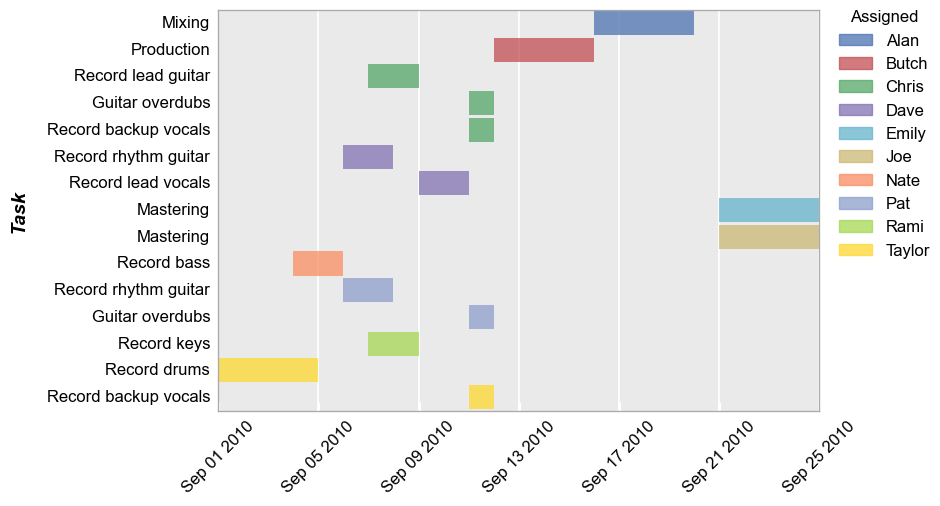

In [6]:
fcp.gantt(df, x=['Start', 'Stop'], y='Task', legend='Assigned', ax_size=[600, 400], gantt_tick_labels_x_rotation=45, order_by_legend=True)

### Row/column plot

Row grouping (`share_y` is automatically disabled):

Text(0, 0, 'Category=Post')
> /Users/steve/Code/fivecentplots/src/fivecentplots/engines/mpl.py(3350)set_axes_rc_labels()
   3348 
   3349         # Col/wrap labels
-> 3350         if (ir == 0 and self.label_col.on) or self.label_wrap.on:
   3351             if self.label_wrap.on:
   3352                 if not self.label_wrap.values_only:

Text(0, 0, 'Category=Recording')
> /Users/steve/Code/fivecentplots/src/fivecentplots/engines/mpl.py(3350)set_axes_rc_labels()
   3348 
   3349         # Col/wrap labels
-> 3350         if (ir == 0 and self.label_col.on) or self.label_wrap.on:
   3351             if self.label_wrap.on:
   3352                 if not self.label_wrap.values_only:



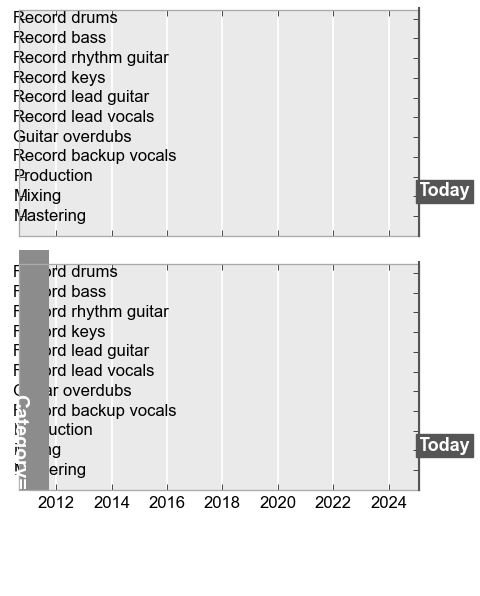

In [418]:
fcp.gantt(df, x=['Start', 'Stop'], y='Task', row='Category', ax_size=[400, 240])

Column grouping (`share_y` is automatically disabled):

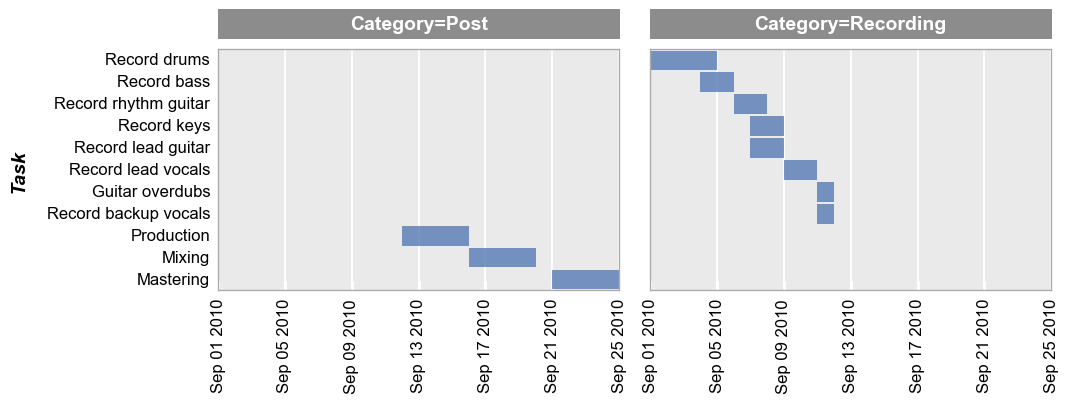

In [8]:
fcp.gantt(df, x=['Start', 'Stop'], y='Task', col='Category', ax_size=[400, 240])

### Wrap plot

Notice that `share_y` is enabled for this type of grouping:

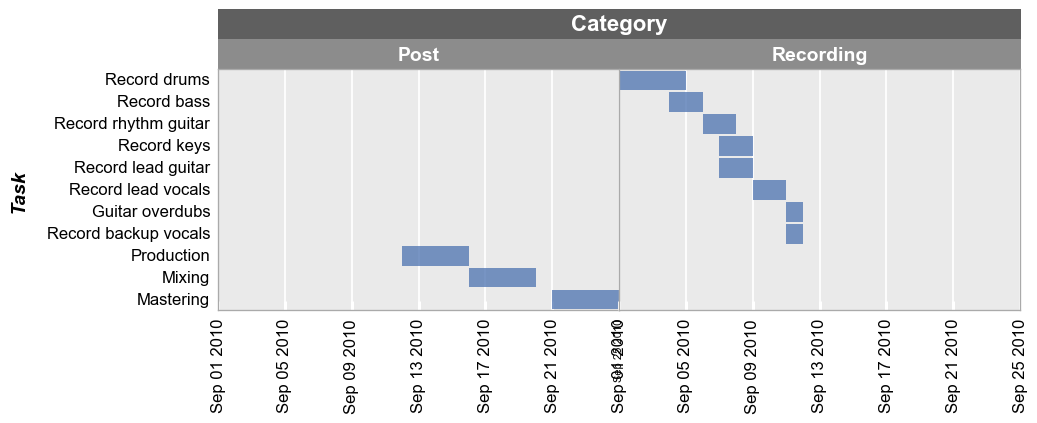

In [9]:
fcp.gantt(df, x=['Start', 'Stop'], y='Task', wrap='Category', ax_size=[400, 240])

## Styling

Default style:

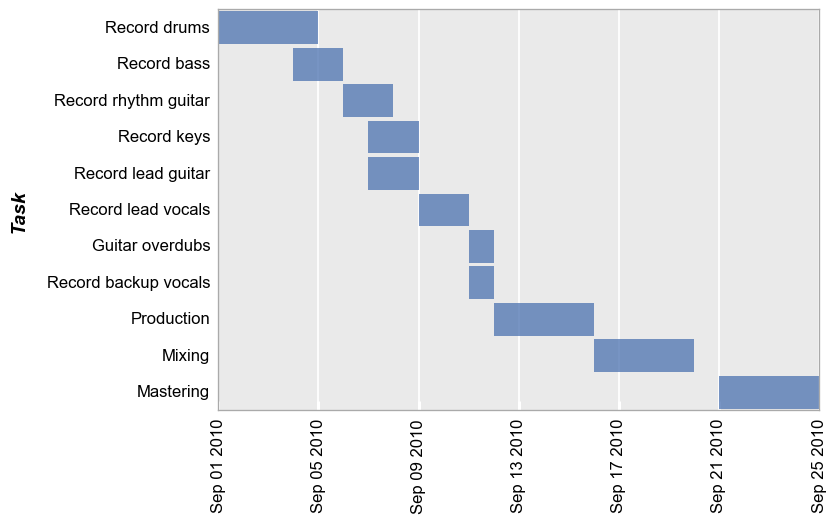

In [10]:
fcp.gantt(df, x=['Start', 'Stop'], y='Task', ax_size=[600, 400])

Now with various style modifications:

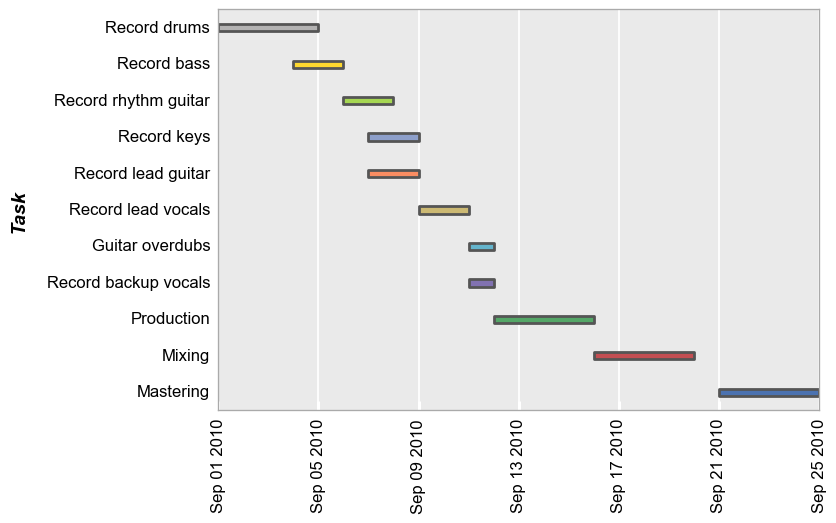

In [11]:
fcp.gantt(df, x=['Start', 'Stop'], y='Task', ax_size=[600, 400], color_by_bar=True,
          gantt_edge_width=2, gantt_edge_color='#555555', gantt_height=0.2, gantt_fill_alpha=1)

## Sorting

By default, the sorting order of tasks is "descending" from top to bottom by date.  We can flip that behavior with the keyword `sort='ascending'`:

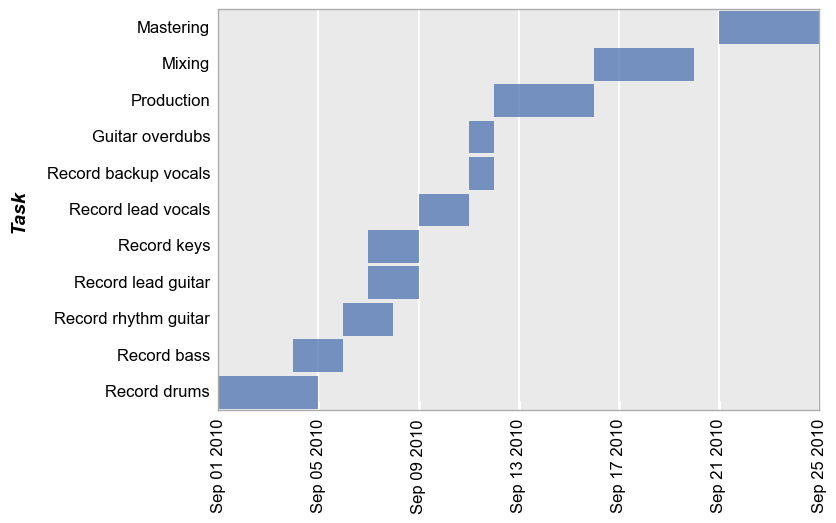

In [12]:
fcp.gantt(df, x=['Start', 'Stop'], y='Task', sort='ascending', ax_size=[600, 400])

In [2]:
df = pd.read_csv(Path(fcp.__file__).parent / 'test_data/fake_data_gantt_milestone.csv')
df

,Quarter,Priority,Workstream,Description,Owner,Start date,End date,Duration,Milestone,Dependency
0,2025-Q1,P0,Design,Pixel layout,Gary Garrison,01-01-2025,NaN,2w,NaN,NaN
1,2025-Q1,P0,Design,Periphery circuits,Andy Anderson,01-20-2025,03-31-2025,NaN,NaN,Pixel layout
2,2025-Q1,P1,Design,TCAD simulation,Sam Samuelson,02-22-2025,NaN,10d,NaN,NaN
3,2025-Q1,P2,Design,Initial tape out,Amber Amberly,02-22-2025,03-15-2025,NaN,NaN,NaN
4,2025-Q2,P0,Design,Finalize tape out,Amber Amberly,NaN,NaN,1.5m,NaN,Pixel layout; Periphery circuits
5,2025-Q2,P0,Design,Deliver tape out,Amber Amberly,05-30-2025,NaN,NaN,NaN,Finalize tape out
6,2025-Q2,P1,Fab,Test chip,Karthik Sweeny,03-01-2025,04-15-2025,NaN,NaN,NaN
7,2025-Q3,P0,Fab,Alpha samples,Karthik Sweeny,06-30-2025,09-15-2025,NaN,NaN,Deliver tape out
8,2025-Q3,P0,Fab,Beta samples,Karthik Sweeny,10-01-2025,02-15-2026,NaN,NaN,Alpha samples
9,2025-Q2,P0,Test,Test chip eval,Denvyr Loud,04-15-2025,05-15-2025,NaN,NaN,NaN


> /Users/steve/Code/fivecentplots/src/fivecentplots/engines/mpl.py(1248)add_text()
   1246 
   1247             # Update element with the actual object reference
-> 1248             if element and track_element:
   1249                 if el.obj is None:
   1250                     el.obj = text_obj

'Alpha sample testing'
(np.datetime64('2025-12-15T00:00:00.000000000'), 0)
(np.datetime64('2025-12-15T00:00:00.000000000'), 0)
datetime.timedelta(days=1)
*** TypeError: unsupported operand type(s) for +: 'int' and 'datetime.timedelta'
np.datetime64('2025-12-15T00:00:00.000000000')
np.datetime64('2025-12-15T00:00:00.000000000')
datetime.timedelta(days=1)
*** TypeError: unsupported operand type(s) for +: 'int' and 'datetime.timedelta'


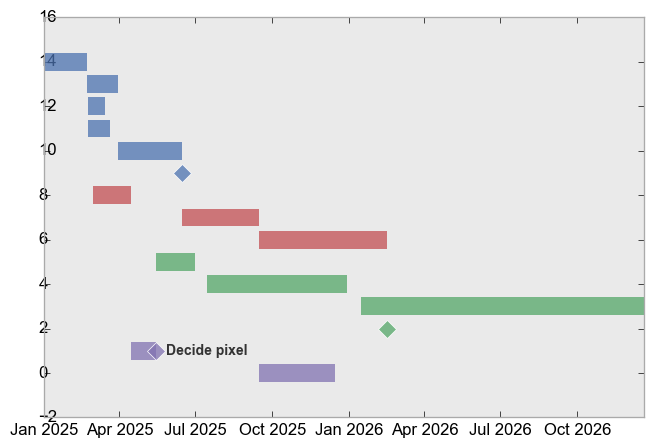

In [566]:
fcp.gantt(df, x=['Start date', 'End date'], y='Description', #legend='Owner',
          ax_size=[600, 400], date_type='quarter', workstreams='Workstream',
          labels_as_yticks=False, #workstreams_title=False,
          show=True, workstreams_label_font_size=12)#, today=False)


In [113]:
fcp.gantt(df, x=['Start date', 'End date'], y='Description', #legend='Owner',
          ax_size=[600, 400], date_type='quarter', workstreams='Workstream',
          #workstreams_title=False,
          show=True, workstreams_label_font_size=12)#, today=False)


    - date_type
    - workstreams
    - workstreams_label_font_size


legend position is wrong period.  but tick size doesn't fully translate when moved to the top, must be some other tick_param

In [7]:
df = pd.read_csv(Path(fcp.__file__).parent / 'test_data/fake_data_gantt_milestone.csv')
fcp.gantt(df, x=['Start date', 'End date'], y='Description',
          ax_size=[900, 400],
          # legend='Owner',
          date_type='quarter',
          workstreams='Workstream',
          # bar_labels='Owner',
          # today=datetime.datetime(2026, 3, 6),
          # today_text='Start',
          #xmin=datetime.datetime(2025, 6, 15),
          show=True,
          xmax=datetime.datetime(2027, 3, 1),
          workstreams_label_font_size=12,
          milestone_text_location='right',
          workstreams_match_bar_color=True
          )
# XMAX NOT WORKING MANUALLY OR WITH


    - milestone_text_location
    - workstreams_match_bar_color


In [514]:
df.loc[9, 'Milestone']

'Decide\\npixel'